In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Plotting two normally distributed variables Y1 and Y2

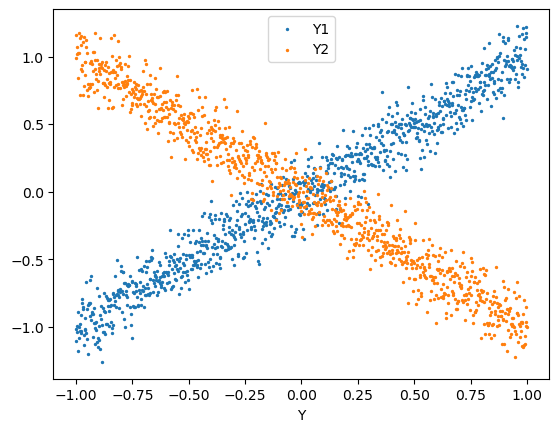

In [ ]:
X = np.linspace(-1, 1, 1000)

Y1 = X + np.random.normal(0, 0.5, (1000,))/4
Y2 = -X + np.random.normal(0, 0.5, (1000,))/4

plt.scatter(X, Y1, label="Y1", s=2)
plt.scatter(X, Y2, label="Y2", s=2)
plt.xlabel("X")
plt.xlabel("Y")
plt.legend(loc=9)
plt.show()

Correlation coefficients indicate the linear strength of the relation between X and Y1, X and Y2

In [ ]:
print("Correlation between X and Y1:")
print(np.corrcoef(X, Y1))
print("Correlation between X and Y2:")
print(np.corrcoef(X, Y2))
print("Correlation between X, Y1, and Y2:")
print(np.corrcoef([X, Y1, Y2]))

Correlation between X and Y1:
[[1.        0.9770436]
 [0.9770436 1.       ]]
Correlation between X and Y2:
[[ 1.        -0.9775877]
 [-0.9775877  1.       ]]
Correlation between X, Y1, and Y2:
[[ 1.         0.9770436 -0.9775877]
 [ 0.9770436  1.        -0.9525965]
 [-0.9775877 -0.9525965  1.       ]]


$$
    r = \frac{\sum (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum(x_i-\overline{x})^2 \sum(y_i-\overline{y})^2}}
$$

In [ ]:
def corrcoef(x, y):
    return np.sum((x-x.mean()) * (y-y.mean())) / np.sqrt(np.sum((x-x.mean())**2) * np.sum((y-y.mean())**2))

np.array([
    [corrcoef(X, X), corrcoef(X, Y1), corrcoef(X, Y2)],
    [corrcoef(Y1, X), corrcoef(Y1, Y1), corrcoef(Y1, Y2)],
    [corrcoef(Y2, X), corrcoef(Y2, Y1), corrcoef(Y2, Y2)]
])

array([[ 1.       ,  0.9770436, -0.9775877],
       [ 0.9770436,  1.       , -0.9525965],
       [-0.9775877, -0.9525965,  1.       ]])

Rescaling (standardizing) data involves setting the features to have mean 0 and standard deviation 1 via 
$$
    \frac{X - \mu}{\sigma}
$$

In [ ]:
data = np.array([
    [-3, -1, 1],
    [-1, 0, 1],
    [1, 1, 1]
], dtype='float64')


def rescale(data):
    means = data.mean(axis=1)
    stds = data.std(axis=1, ddof=1)
    return np.divide(data - means, stds, out=data, where=stds>0)

res = rescale(data=data)
res

array([[-1., -1.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  1.,  1.]])

In [ ]:
res.mean(axis=0), res.std(axis=0, ddof=1)

(array([0., 0., 1.]), array([1., 1., 0.]))

Normalizing data involves using the minimum and maximum as bounds to rescale (instead of the mean and standard deviation)
$$
    X' = \frac{X-min(X)}{max(X)-min(X)}
$$

In [ ]:
norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
norm.mean(axis=0), norm.std(axis=0, ddof=1)

C:\Users\janba\AppData\Local\Temp\ipykernel_26320\2033419476.py:1: RuntimeWarning: invalid value encountered in divide
  norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))


(array([0.5, 0.5, nan]), array([0.5, 0.5, nan]))

Example:

In [ ]:
data = np.array([
    [63, 160, 150],
    [67, 170.2, 160],
    [70, 177.8, 171]
], dtype='float64')

res = rescale(data=data)
res

array([[-1.14961835,  0.48534117,  0.17226761],
       [-1.07464324,  0.66470638,  0.33790955],
       [-1.01841191,  0.79835105,  0.52011568]])

In [ ]:
res.mean(axis=0), res.std(axis=0, ddof=1)

(array([-1.08089117,  0.6494662 ,  0.34343095]),
 array([0.06582598, 0.15706048, 0.17398975]))

In [3]:
df = pd.read_csv("../datasets/iris.csv")

df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


Statistical insight via summary statistics

In [74]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
df.skew(numeric_only=True)

sepal.length    0.314911
sepal.width     0.318966
petal.length   -0.274884
petal.width    -0.102967
dtype: float64

In [77]:
df.kurt(numeric_only=True)

sepal.length   -0.552064
sepal.width     0.228249
petal.length   -1.402103
petal.width    -1.340604
dtype: float64

Histograms of individual variables (normally distributed?)

<AxesSubplot: xlabel='variety', ylabel='Count'>

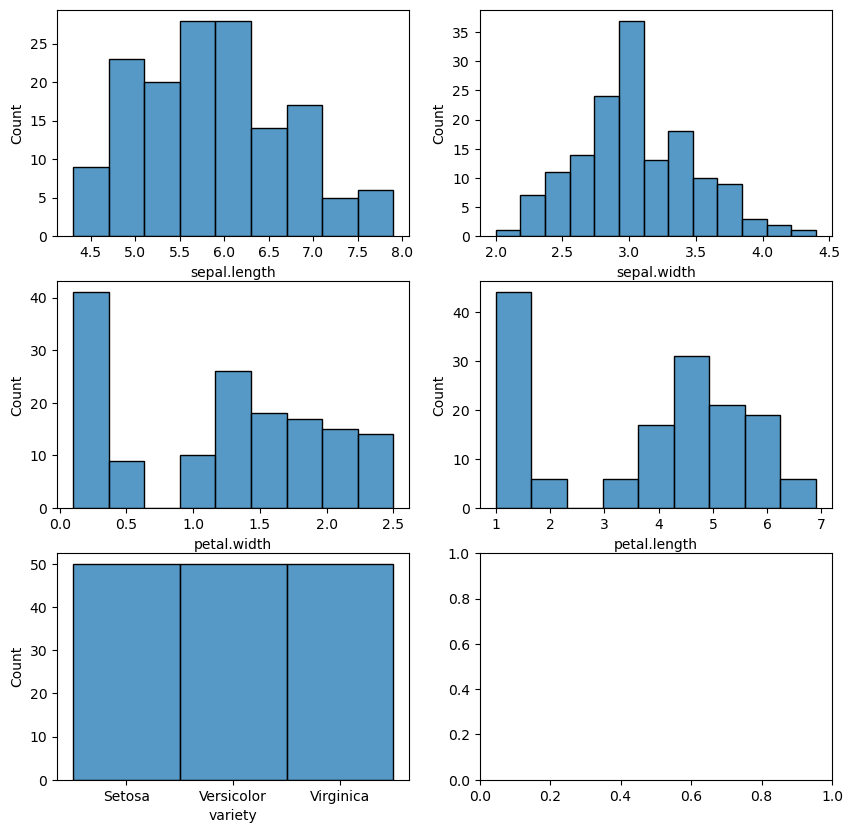

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(df["sepal.length"], ax=axes[0][0])
sns.histplot(df["sepal.width"], ax=axes[0][1])
sns.histplot(df["petal.width"], ax=axes[1][0])
sns.histplot(df["petal.length"], ax=axes[1][1])
sns.histplot(df["variety"], ax=axes[2][0])

Correlation matrix
- use Pearson to explore **linear relationships**
- use Spearman to explore **monotonic relationships**

In [24]:
pearson_corr = df.corr('pearson', numeric_only=True)
spearman_corr = df.corr('spearman', numeric_only=True)

print("Pearson")
print(pearson_corr)
print()
print("Spearman")
print(spearman_corr)

Pearson
              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000

Spearman
              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.166778      0.881898     0.834289
sepal.width      -0.166778     1.000000     -0.309635    -0.289032
petal.length      0.881898    -0.309635      1.000000     0.937667
petal.width       0.834289    -0.289032      0.937667     1.000000


In [36]:
df[df["variety"] == "Setosa"].corr("pearson", numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,0.742547,0.267176,0.278098
sepal.width,0.742547,1.000000,0.177700,0.232752
petal.length,0.267176,0.177700,1.000000,0.331630
petal.width,0.278098,0.232752,0.331630,1.000000


In [37]:
df[df["variety"] == "Versicolor"].corr("pearson", numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,0.525911,0.754049,0.546461
sepal.width,0.525911,1.000000,0.560522,0.663999
petal.length,0.754049,0.560522,1.000000,0.786668
petal.width,0.546461,0.663999,0.786668,1.000000


In [38]:
df[df["variety"] == "Virginica"].corr("pearson", numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,0.457228,0.864225,0.281108
sepal.width,0.457228,1.000000,0.401045,0.537728
petal.length,0.864225,0.401045,1.000000,0.322108
petal.width,0.281108,0.537728,0.322108,1.000000


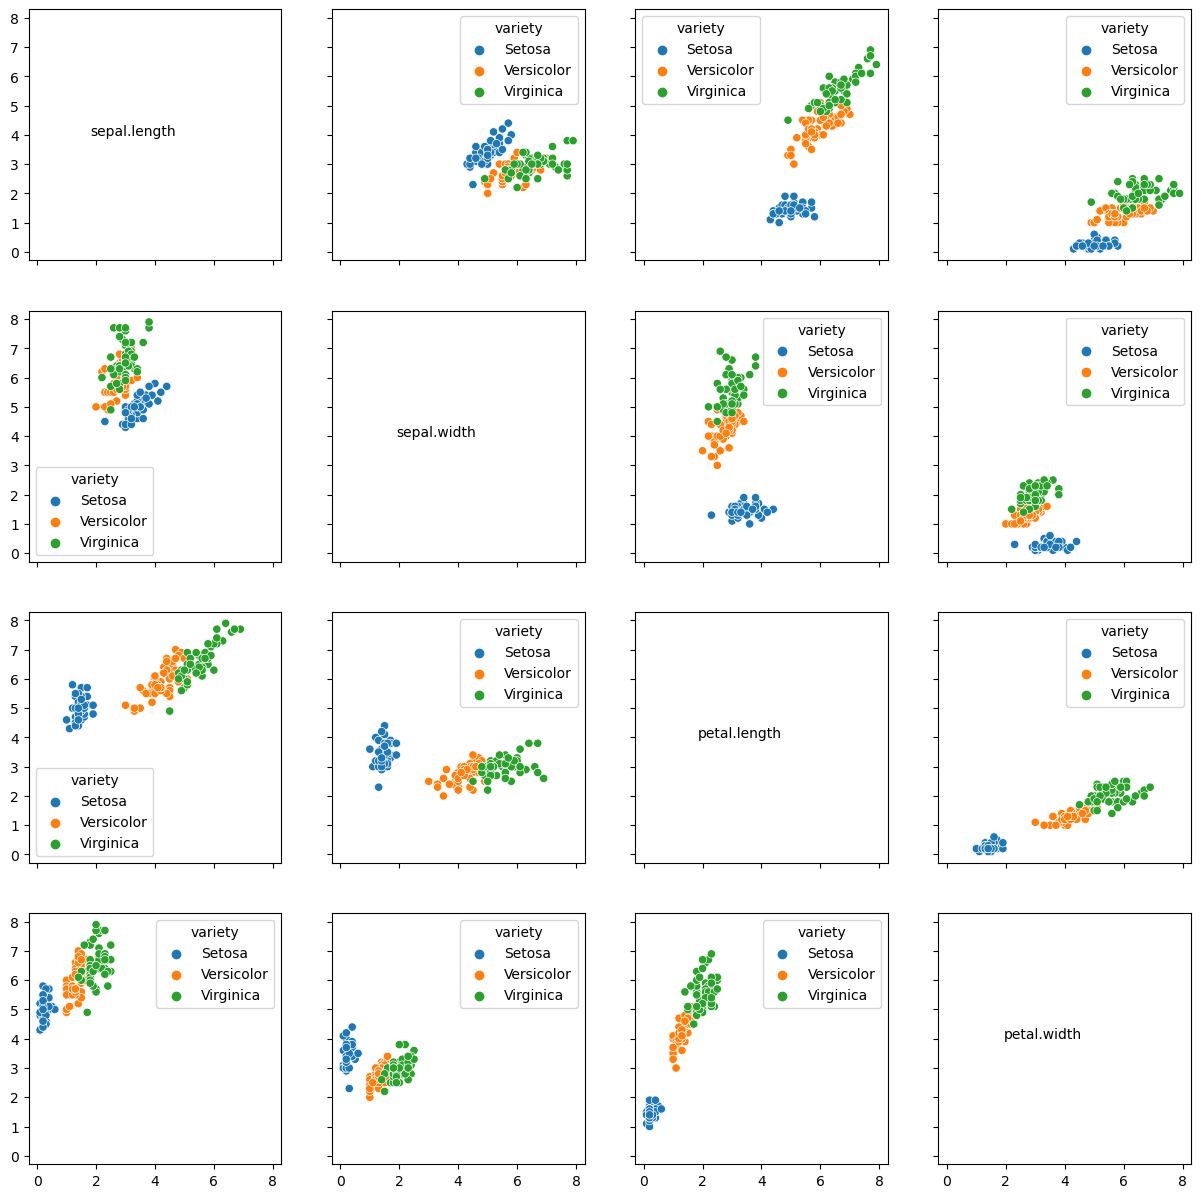

In [80]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15), sharex=True, sharey=True)

_, cols = df.shape

for i in range(cols-1):
    for j in range(cols-1):
        if i == j:
            axes[i][j]
            axes[i][j].annotate(df.iloc[:, i].name, xy=(3.25, 4), xytext=(3.25, 4), ha='center')
            continue
        sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, j], ax=axes[i][j], hue=df['variety'])
        axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("")

plt.show()

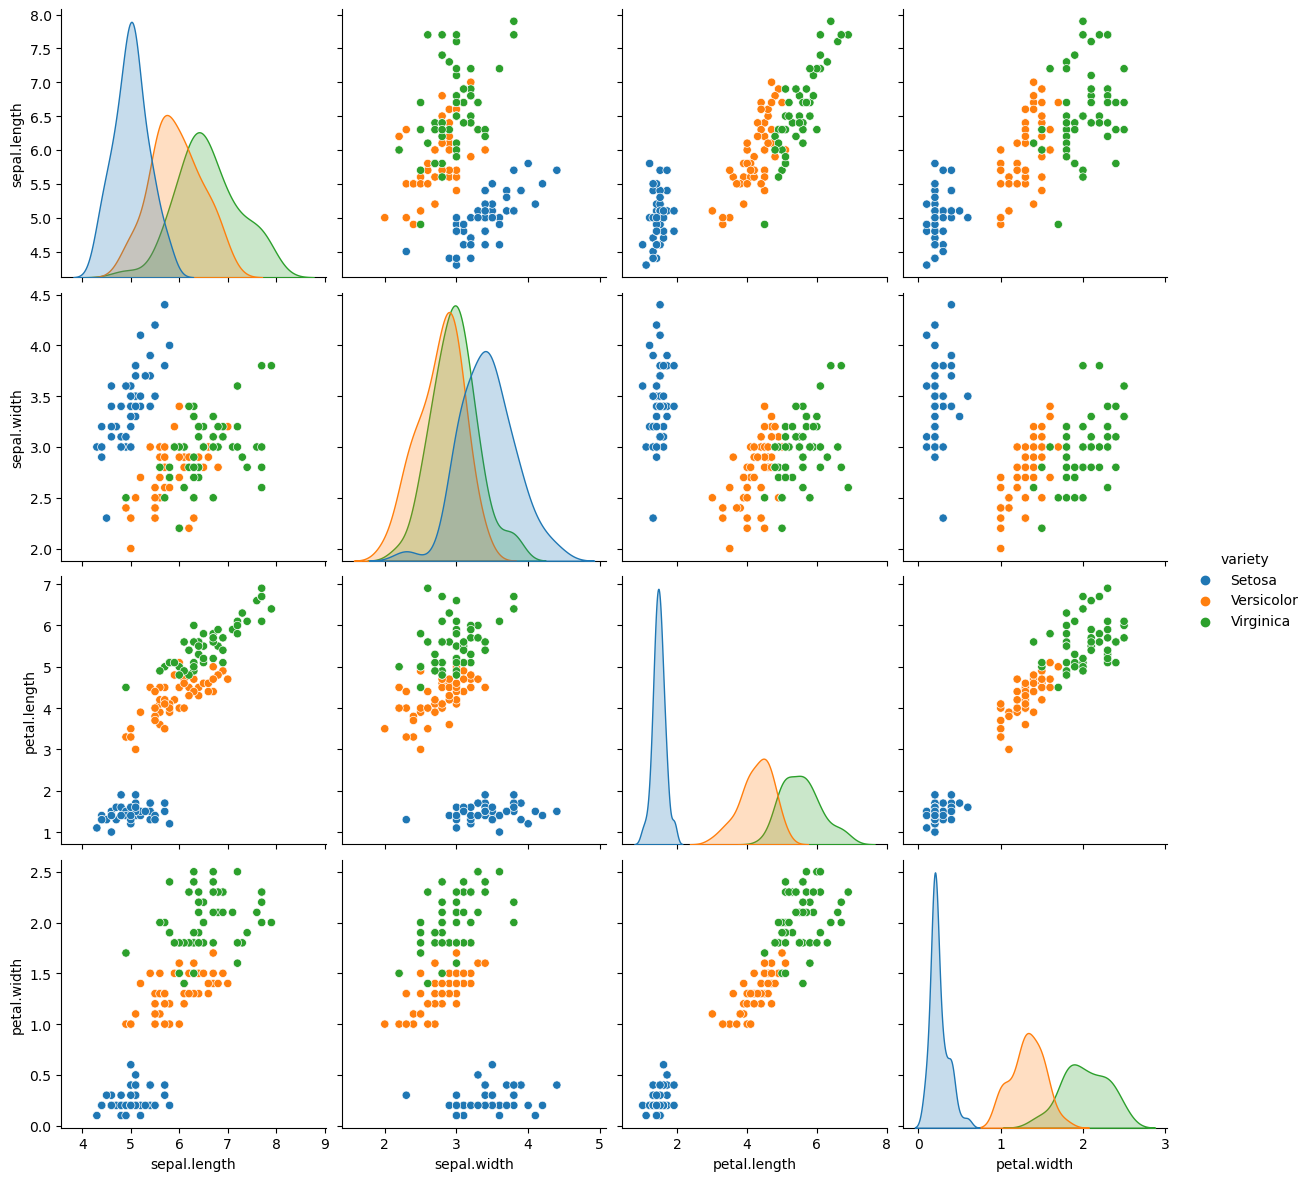

In [81]:
sns.pairplot(df, hue="variety", height=3)